In [13]:
import numpy as np

# read in the text file
with open('Kritias.txt') as f:
    lines = f.readlines()

def show_char_distribution(lines):
    # get histogram of the characters
    frequency_table = {}
    for line in lines:
        for c in line:
            if c in frequency_table:
                frequency_table[c] += 1
            else:
                frequency_table[c] = 1

    # print characters in order of frequency
    for c in sorted(frequency_table, key=frequency_table.get, reverse=True):
        print(c, frequency_table[c])

show_char_distribution(lines)

  7547
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
, 567
p 491
b 438
v 351
. 191
k 142
I 86
A 83
T 79
; 74

 64
x 55
S 36
E 34
q 33
z 31
C 29
: 27
H 26
M 21
O 20
R 17
- 17
j 16
— 14
P 13
W 11
F 11
N 11
L 10
B 9
' 5
U 3
? 3
D 3
Z 3
Y 2
G 2
! 1
J 1
V 1


In [18]:
import re
# remove NAME: prefix of lines 
cleaned_lines = []
regex_name_prefix = re.compile(r'[A-Z]+: ')
regex_unwantend = re.compile(r"[,\-'\n]")
regex_other_punctuation = re.compile(r'[:;!?—]')
for line in lines:
        match = regex_name_prefix.match(line)
        if match and line.startswith(match.group()):
            clean_line = line[len(match.group()):]
        else:
            clean_line = line
        # more cleaning
        clean_line = regex_unwantend.sub(' ', clean_line)
        clean_line = regex_other_punctuation.sub('.', clean_line)
        clean_line = clean_line.replace('  ', ' ')
        cleaned_lines.append(clean_line)

show_char_distribution(cleaned_lines)

  7617
e 4345
t 3202
a 2719
n 2490
o 2410
h 2271
i 2122
s 2048
r 2013
d 1538
l 1231
u 912
f 846
c 814
w 809
m 739
g 628
y 602
p 491
b 438
v 351
. 295
k 142
I 79
A 68
T 64
x 55
q 33
z 31
H 21
C 17
S 16
j 16
E 16
M 13
P 13
W 11
F 11
N 11
L 10
O 10
B 9
D 3
Z 3
Y 2
G 2
J 1
V 1


In [23]:
# get list of sentences
sentences = []
for line in cleaned_lines:
    sentences += line.split('.')
sentences = [s.strip().lower() for s in sentences if s.strip()]

for sentence in sentences:
    print(sentence)
    
# get list of words
words = []
for sentence in sentences:
    words += sentence.split()
words = [w.strip() for w in words if w.strip()]
print(words)

how thankful i am socrates that i have arrived at last and like a weary traveller after a long journey may be at rest
and i pray the being who always was of old and has now been by me revealed to grant that my words may endure in so far as they have been spoken truly and acceptably to him
but if unintentionally i have said anything wrong i pray that he will impose upon me a just retribution and the just retribution of him who errs is that he should be set right
wishing then to speak truly in future concerning the generation of the gods i pray him to give me knowledge which of all medicines is the most perfect and best
and now having offered my prayer i deliver up the argument to critias who is to speak next according to our agreement
and i timaeus accept the trust and as you at first said that you were going to speak of high matters and begged that some forbearance might be shown to you i too ask the same or greater forbearance for what i am about to say
and although i very well know t

In [30]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Get the list of stopwords
stopwords_list = stopwords.words('english')

# Remove stopwords from your text
filtered_words = [word for word in words if word.lower() not in stopwords_list]


[nltk_data] Downloading package stopwords to /home/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# show word distribution
word_frequency_table = {}
for word in filtered_words:
    if word in word_frequency_table:
        word_frequency_table[word] += 1
    else:
        word_frequency_table[word] = 1

for word in sorted(word_frequency_table, key=word_frequency_table.get, reverse=True):
    print(word_frequency_table[word],"\t", word)

26 	 one
22 	 island
21 	 us
19 	 also
19 	 many
19 	 sea
17 	 country
16 	 earth
16 	 land
15 	 gods
15 	 men
14 	 may
14 	 well
14 	 two
13 	 first
13 	 great
13 	 let
13 	 temple
12 	 said
12 	 mountains
12 	 kings
11 	 critias
11 	 divine
11 	 things
11 	 every
11 	 time
11 	 city
11 	 days
11 	 common
11 	 water
11 	 stadia
11 	 ten
10 	 like
10 	 must
10 	 another
10 	 side
10 	 atlantis
10 	 others
10 	 names
10 	 gave
9 	 made
9 	 dwelt
9 	 whole
9 	 nature
9 	 virtue
9 	 soil
9 	 poseidon
9 	 centre
9 	 zones
8 	 far
8 	 upon
8 	 human
8 	 would
8 	 part
8 	 thousand
8 	 called
8 	 round
8 	 gold
8 	 plain
8 	 god
7 	 rest
7 	 speak
7 	 timaeus
7 	 shall
7 	 hermocrates
7 	 order
7 	 brought
7 	 war
7 	 use
7 	 wisdom
7 	 children
7 	 laws
7 	 generations
7 	 life
7 	 number
7 	 largest
7 	 name
7 	 three
7 	 hundred
7 	 width
7 	 horses
6 	 socrates
6 	 long
6 	 set
6 	 best
6 	 next
6 	 according
6 	 make
6 	 already
6 	 judgment
6 	 place
6 	 making
6 	 places
6 	 manner
6 

In [34]:
# get term sentence matrix
relevant_words = filtered_words
term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i, sentence in enumerate(sentences):
    for j, word in enumerate(relevant_words):
        term_sentence_matrix[j, i] = sentence.count(word)
        
normalized_term_sentence_matrix = np.zeros((len(relevant_words), len(sentences)))
for i in range(len(relevant_words)):
    normalized_term_sentence_matrix[i] = term_sentence_matrix[i] / np.linalg.norm(term_sentence_matrix[i])
    
print(term_sentence_matrix)
print(term_sentence_matrix.shape)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
(3354, 288)


In [36]:
# rank reduction by svd
U, s, V = np.linalg.svd(normalized_term_sentence_matrix)
rank = 10
U_rank = U[:, :rank]
s_rank = np.diag(s[:rank])
V_rank = V[:rank, :]
term_sentence_matrix_rank = U_rank @ s_rank @ V_rank
print(term_sentence_matrix_rank)

[[0.00383068 0.00333842 0.00415211 ... 0.00434852 0.00406368 0.00266345]
 [0.00655352 0.00489791 0.00988369 ... 0.00580528 0.01057459 0.00341529]
 [0.00383068 0.00333842 0.00415211 ... 0.00434852 0.00406368 0.00266345]
 ...
 [0.00416465 0.0054696  0.00762327 ... 0.00999359 0.00474198 0.01238108]
 [0.00228203 0.00366318 0.00481243 ... 0.00764102 0.00249777 0.01004677]
 [0.00266345 0.00467042 0.00582047 ... 0.00951009 0.00268034 0.01293205]]


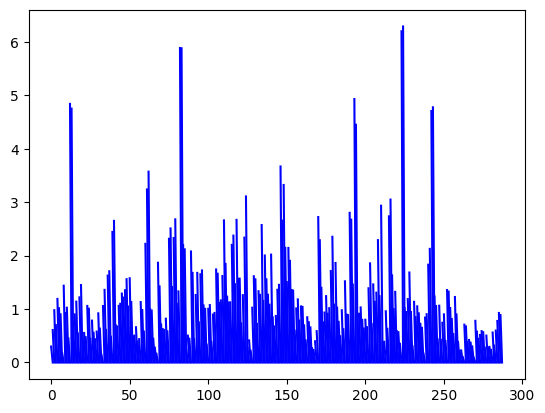

In [53]:
# plot the distance between two consecutive sentences
for i in range(len(sentences)-1):
    plt.plot([i, i+1], [np.linalg.norm(term_sentence_matrix_rank[:, i] - term_sentence_matrix_rank[:, i+1]), 0], "b")

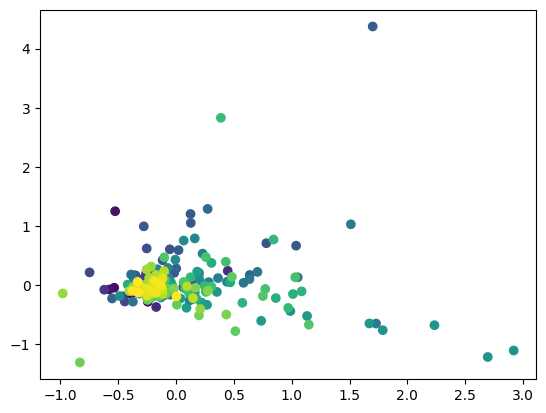

In [40]:
# use pca to display the data in 2D with progressive color
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(term_sentence_matrix_rank.T)
X = pca.transform(term_sentence_matrix_rank.T)
plt.scatter(X[:, 0], X[:, 1], c=range(len(sentences)))


In [41]:
# cluster the sentences

def k_means_iteration(data,currentCentroids):
    cluster1=[]
    cluster2=[]
    cluster3=[]
    quality=0
    for i in range(len(data)):
        distance1=np.linalg.norm(data[i]-currentCentroids[0])
        distance2=np.linalg.norm(data[i]-currentCentroids[1])
        distance3=np.linalg.norm(data[i]-currentCentroids[2])
        if distance1<=distance2 and distance1<=distance3:
            cluster1.append(data[i])
            quality+=distance1
        elif distance2<=distance1 and distance2<=distance3:
            cluster2.append(data[i])
            quality+=distance2
        else:
            cluster3.append(data[i])
            quality+=distance3
    newCentroid1=np.mean(cluster1,axis=0)
    newCentroid2=np.mean(cluster2,axis=0)
    newCentroid3=np.mean(cluster3,axis=0)
    print("quality: ",quality)
    return [newCentroid1,newCentroid2,newCentroid3], [cluster1, cluster2, cluster3]


def k_means_algotithm(data, initial_Centroid1, initial_Centroid2, initial_Centroid3):
    oldCentroids=[initial_Centroid1,initial_Centroid2,initial_Centroid3]
    newCentroids, newClusters=k_means_iteration(data,oldCentroids)
    while not np.array_equal(oldCentroids,newCentroids):
        oldCentroids=newCentroids
        newCentroids, newClusters =k_means_iteration(data,oldCentroids)
    return newCentroids, newClusters

def k_means_algorithm(data):
    initial_centroids = data[np.random.choice(data.shape[0], 3, replace=False)]
    return k_means_algotithm(data, initial_centroids[0], initial_centroids[1], initial_centroids[2])

In [46]:
centroids, clusters = k_means_algorithm(term_sentence_matrix_rank.T)
for centroid in centroids:
    print(centroid)

quality:  262.65585807380677
quality:  249.0444412186122
quality:  248.27947315033032
quality:  247.7930744015932
quality:  247.64625445453026
quality:  247.3107348563403
quality:  247.12027844814293
quality:  246.88393416651385
quality:  246.8324802397195
quality:  246.7685362535402
quality:  246.48460149047992
quality:  246.34712087978983
quality:  246.12416475114418
quality:  246.36247157603754
quality:  246.6877916126975
quality:  246.8382902548581
quality:  247.15228958698515
quality:  247.49407355959326
quality:  247.3092304909707
quality:  246.51817785507654
quality:  245.98105634882327
quality:  245.62042483273729
quality:  245.61607265198987
[0.00175778 0.00391806 0.00175778 ... 0.00283852 0.00197143 0.00243046]
0.4130139752932337
[-9.00669443e-04  7.46569639e-04 -9.00669443e-04 ... -7.37678081e-04
 -2.65350890e-05 -4.87203933e-04]
1.2189516590202807
[0.00171989 0.0006242  0.00171989 ... 0.00794188 0.00609591 0.00837607]
1.750509308211849


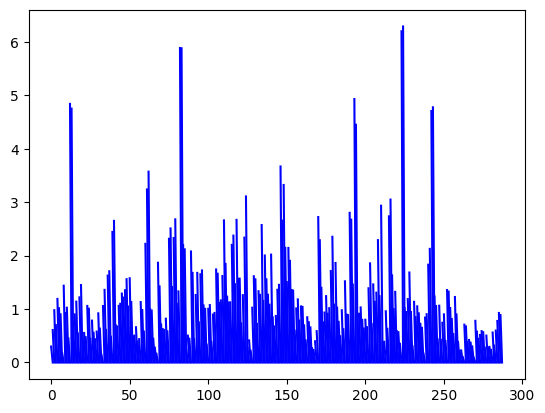